In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# NOTE: I used a custom implementation for the degree centrality.  According to the Eigenvector 
# centrality slides, the degree centrality of a node is simply its degree.  However, networkx's
# implementation scales the degree by dividing by n - 1, where n is the number of nodes in the 
# graph.  I also tested out the degree centrality equation (from the Katz centrality slides) that 
# uses the inverse degree matrix, where I used the principal eigenvector.  The results I saw were 
# basically identical to the results from networkx's implementation (within ~2 decimal places), so 
# it seems that that equation produces a scaled degree value for each node (but I could be wrong).
# Again, since the Eigenvector centrality slides define degree centrality differently, I decided to 
# use that implementation (where the degree centrality of a node is its degree).

### Helper Code

In [3]:
# Custom implementation that uses the degree of a node as its degree centrality
def degree_centrality(graph: nx.Graph) -> None:
    centrality = {}

    for node in graph.nodes:
        node_degree = nx.degree(graph, node)
        centrality[node] = node_degree

    print('Degree centrality:')

    for node, centrality in centrality.items():
        print(f'Node {node}: {centrality}')

In [4]:
def eigenvector_centrality(graph: nx.Graph) -> None:
    centrality = nx.eigenvector_centrality(graph)

    print('Eigenvector centrality:')

    for node, centrality in centrality.items():
        print(f'Node {node}: {centrality}')

In [5]:
def katz_centrality(graph: nx.Graph) -> None:
    centrality = nx.katz_centrality(graph)

    print('Katz centrality:')

    for node, centrality in centrality.items():
        print(f'Node {node}: {centrality}')

In [6]:
def page_rank(graph: nx.Graph) -> None:
    centrality = nx.pagerank(graph)

    print('Page Rank')

    for node, centrality in centrality.items():
        print(f'Node {node}: {centrality}')

### Graph 1

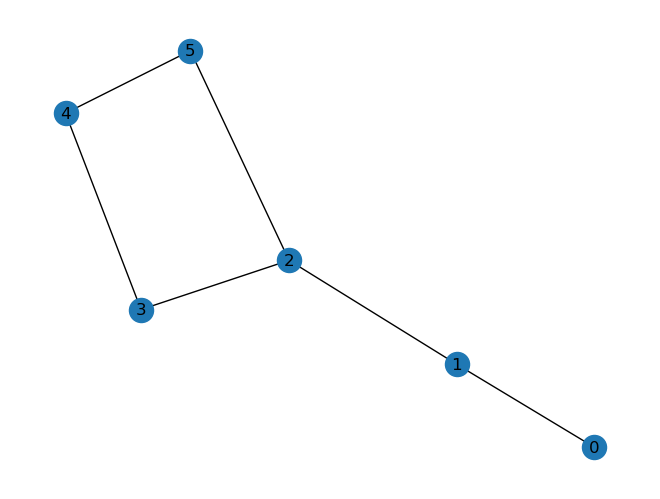

In [7]:
edge_list = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (2, 5)]
G = nx.Graph(edge_list)  
nx.draw(G, with_labels=True)
plt.show()

Degree Centrality

In [8]:
degree_centrality(G)

Degree centrality:
Node 0: 1
Node 1: 2
Node 2: 3
Node 3: 2
Node 4: 2
Node 5: 2


Eigenvector Centrality

In [9]:
eigenvector_centrality(G)

Eigenvector centrality:
Node 0: 0.14943145761283347
Node 1: 0.3250600747376626
Node 2: 0.5576781285921759
Node 3: 0.44403600519071207
Node 4: 0.40824667097935463
Node 5: 0.44403600519071207


Katz Centrality

In [10]:
katz_centrality(G)

Katz centrality:
Node 0: 0.365272399462383
Node 1: 0.4059348894329495
Node 2: 0.4472877403294823
Node 3: 0.41007705498874786
Node 4: 0.4066942771007591
Node 5: 0.41007705498874786


Page Rank

In [11]:
page_rank(G)

Page Rank
Node 0: 0.100546895675278
Node 1: 0.17775588228760858
Node 2: 0.2374999999999999
Node 3: 0.16112205885619563
Node 4: 0.1619531043247219
Node 5: 0.16112205885619563


Looking at a plot of the graph, I would say that focus should be put on node 2 in order to stop the spread of a simple contagion.  Node 2 connects nodes 0 and 1 to the remainder of the graph, so it seems like an important node.  For this particular graph, it just so happens that every centrality metric places more importance on node 2, so it would appear that any metric would be useful in this scenario.  In short, any of the metrics could be used to identify the importance of node 2 and remove some/all of its edges in order to prevent the spread of simple contagion.

### Graph 2

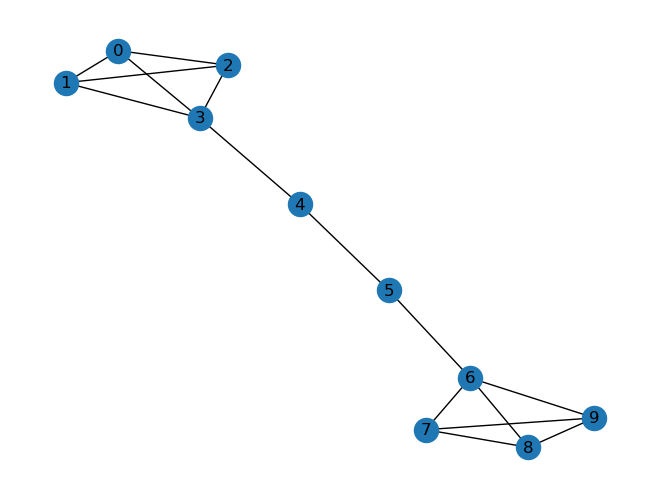

In [12]:
G = nx.barbell_graph(4, 2)
nx.draw(G, with_labels=True)
plt.show()

Degree Centrality

In [13]:
degree_centrality(G)

Degree centrality:
Node 0: 3
Node 1: 3
Node 2: 3
Node 3: 4
Node 4: 2
Node 5: 2
Node 6: 4
Node 7: 3
Node 8: 3
Node 9: 3


Eigenvector Centrality

In [14]:
eigenvector_centrality(G)

Eigenvector centrality:
Node 0: 0.3313356626032589
Node 1: 0.3313356626032589
Node 2: 0.3313356626032589
Node 3: 0.37388677455324615
Node 4: 0.17566649047541238
Node 5: 0.17566649047541238
Node 6: 0.3738867745532462
Node 7: 0.3313356626032589
Node 8: 0.3313356626032589
Node 9: 0.3313356626032589


Katz Centrality

In [15]:
katz_centrality(G)

Katz centrality:
Node 0: 0.317555711610172
Node 1: 0.317555711610172
Node 2: 0.317555711610172
Node 3: 0.34321677493348407
Node 4: 0.28227177591025626
Node 5: 0.28227177591025626
Node 6: 0.34321677493348407
Node 7: 0.317555711610172
Node 8: 0.317555711610172
Node 9: 0.317555711610172


Page Rank

In [16]:
page_rank(G)

Page Rank
Node 0: 0.09849824269266758
Node 1: 0.09849824269266758
Node 2: 0.09849824269266758
Node 3: 0.13027253212987572
Node 4: 0.0742327397921214
Node 5: 0.0742327397921214
Node 6: 0.13027253212987572
Node 7: 0.09849824269266758
Node 8: 0.09849824269266758
Node 9: 0.09849824269266758


After looking at the graph plot, I would say that nodes 3, 4, 5, and 6 are the most important nodes.  Nodes 3 and 6 have the largest degree and connect their barbell with the rest of the graph, so they are arguably the most important (i.e. if node 3 and/or node 6 get infected, there's a good chance that the remainder of the network will get infected).  Nodes 4 and 5 are nodes in the middle and also serve as a connection between the two barbells, so they are arguably important as well.  Based on these observations, I would say that either Katz centrality or Page Rank would be the best metric for this graph.  With both metrics, the most importance is placed on nodes 3 and 6, and the importance of nodes 4 and 5 are smaller.  While the centralities of nodes 4 and 5 are the smallest overall with every metric, it appears that less importance is given to them in degree centrality and eigenvector centrality.  In short, Katz centrality or Page Rank could be used to identify the importance of nodes 3 and 6 (and perhaps nodes 4 and 5) and remove some/all of their edges (hopefully at least the barbell-connecting edges) in order to prevent the spread of simple contagion.

### Graph 3

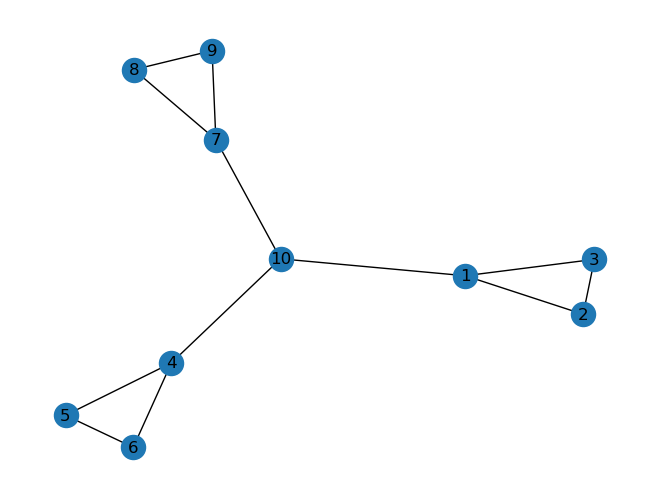

In [17]:
edge_list = [(1, 2), (1, 3), (2, 3), (1, 10), (4, 5), (4, 6), (5, 6), (4, 10), (7, 8), 
             (7, 9), (8, 9), (7, 10)]
G = nx.Graph(edge_list)  
nx.draw(G, with_labels=True)
plt.show()

Degree Centrality

In [18]:
degree_centrality(G)

Degree centrality:
Node 1: 3
Node 2: 2
Node 3: 2
Node 10: 3
Node 4: 3
Node 5: 2
Node 6: 2
Node 7: 3
Node 8: 2
Node 9: 2


Eigenvector Centrality

In [19]:
eigenvector_centrality(G)

Eigenvector centrality:
Node 1: 0.376863445910381
Node 2: 0.2488970530242655
Node 3: 0.2488970530242655
Node 10: 0.44969252982974467
Node 4: 0.37686344591038107
Node 5: 0.24889705302426546
Node 6: 0.24889705302426546
Node 7: 0.37686344591038107
Node 8: 0.24889705302426546
Node 9: 0.24889705302426546


Katz Centrality

In [20]:
katz_centrality(G)

Katz centrality:
Node 1: 0.3337801475342099
Node 2: 0.30292654419244003
Node 3: 0.30292654419244003
Node 10: 0.3393898824035229
Node 4: 0.3337801475342099
Node 5: 0.30292654419244003
Node 6: 0.30292654419244003
Node 7: 0.3337801475342099
Node 8: 0.30292654419244003
Node 9: 0.30292654419244003


Page Rank

In [21]:
page_rank(G)

Page Rank
Node 1: 0.12171887087454254
Node 2: 0.0860639356434122
Node 3: 0.0860639356434122
Node 10: 0.11845977351589883
Node 4: 0.12171887087454254
Node 5: 0.0860639356434122
Node 6: 0.0860639356434122
Node 7: 0.12171887087454254
Node 8: 0.0860639356434122
Node 9: 0.0860639356434122


For this graph, I would argue that node 10 is the most important, at least in terms of simple contagion.  This is due to the fact that node 10 connects three separate triads (i.e. if node 10 is infected then there's a good chance that the entire network will be infected).  Based on this observation, I would say that eigenvector centrality is probably the best metric, with arguably Katz centrality as a second option.  With eigenvector centrality, node 10 clearly has the largest value, which is what we would like to see.  With Katz centrality, node 10 still maintains the largest centrality value, but it's only marginally larger than the values of nodes 1, 4, and 7.  With the other two metrics (degree centrality and Page Rank), node 10 does not possess the largest value.  In short, eigenvector centrality could be used to identify the importance of node 10 and remove its edges in order to prevent the spread of simple contagion.

### Graph 4 

Note: This is the "email Enron only" graph, found at https://networkrepository.com/email-enron-only.php.  It contains 143 nodes.

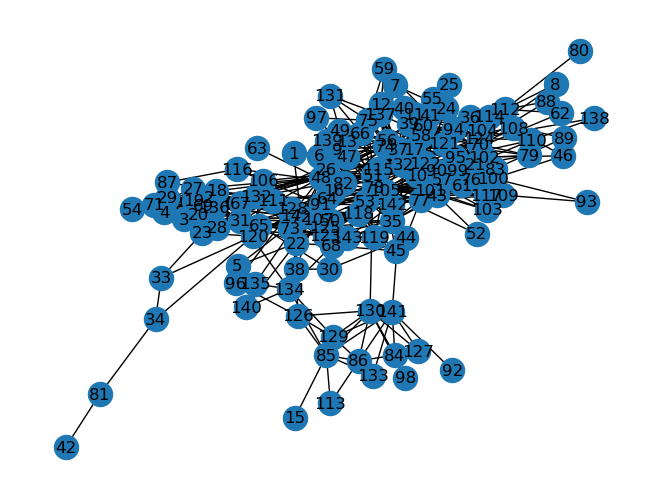

In [22]:
# Code from the project 1 lab specs (to read in a graph from an mtx file)
def _read_graph_from_file(filename):
    fo = open(filename, 'r')
    line = fo.readline()  # Read file header
    line = fo.readline()  # Number of vertices and edges
    if not line:
        print('error -- illegal format for input')
        return
    v = line.split(" ")
    numVertices = int(v[0])
    G = nx.Graph()
    G.add_nodes_from(range(1,numVertices+1))
    while True:
        line = fo.readline()
        if not line:
            break
        #print("Line{}: {}".format(count,line.strip()))
        v = line.split(" ")
        v1 = int(v[0])
        v2 = int(v[1])
        G.add_edge(v1,v2)
        G.add_edge(v2,v1)
    fo.close()
    return G

G = _read_graph_from_file('./hw6_files/email-enron-only.mtx')
nx.draw(G, with_labels=True)
plt.show()

Page Rank

In [23]:
page_rank(G)

Page Rank
Node 1: 0.0023120359296268543
Node 2: 0.007718019663306051
Node 3: 0.007166066940044207
Node 4: 0.006687851008781628
Node 5: 0.002368839601522151
Node 6: 0.0064393055806896094
Node 7: 0.004391319850578999
Node 8: 0.0026667734518958227
Node 9: 0.008603786856214875
Node 10: 0.0063394685548881
Node 11: 0.0063676262236329285
Node 12: 0.004997632548408219
Node 13: 0.007765183511589537
Node 14: 0.0064658785227803845
Node 15: 0.002198324634527105
Node 16: 0.007021006166681283
Node 17: 0.0223554451933045
Node 18: 0.006198271054354327
Node 19: 0.0093217332297498
Node 20: 0.009905681834800222
Node 21: 0.005090453771340945
Node 22: 0.011368214740422775
Node 23: 0.005970699047220437
Node 24: 0.006588991951808287
Node 25: 0.0038518545573044136
Node 26: 0.0077991496093613175
Node 27: 0.006172598307121674
Node 28: 0.0061990479880426165
Node 29: 0.006670424854552443
Node 30: 0.0038985257110845696
Node 31: 0.01101028440637791
Node 32: 0.012740492669035718
Node 33: 0.004685609901718131
Node 34

I chose to calculate Page Rank for this graph.  There are probably numerous challenges to removing nodes in an effort to stop the spread of simple contagion, but here are a few that come to mind:
<ul>
    <li> As we saw with the previous graphs, none of the metrics are perfect for every scenario.  With more complicated networks, it's probably difficult to select an appropriate centrality metric.  With the previous three graphs we examined, they were all fairly simple and we were able to "eyeball" which nodes were the most important.  Now that we're dealing with 100+ nodes, it's harder to do the same thing.
    <li> In real life, networks probably change over time.  By the time analysis is conducted about which nodes to remove/isolate, the network structure could be different.
    <li> There are probably ethical considerations about how to remove nodes (or if nodes should be removed at all) if nodes represent people.
</ul>